<a href="https://colab.research.google.com/github/saniazahan/Basics_of_pytorch/blob/master/pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np


In [ ]:
x = torch.rand(3)
t1 = torch.tensor([1.0,5])
print(t1)
print(x)
t1.shape

y = np.array([[1,2],[2,3.]])
p = torch.tensor(y)
print(p)
print(p.dtype)

y2 = p.numpy()
print(y2)

x = torch.tensor(3.)
y = torch.tensor(4.,requires_grad=True)
z = torch.tensor(5., requires_grad=True)

w = x*y+z
print(w)

pp = w.backward()
print('dw/dx',x.grad)
print('dw/dy',y.grad)


tensor([1., 5.])
tensor([0.2678, 0.0363, 0.9728])
tensor([[1., 2.],
        [2., 3.]], dtype=torch.float64)
torch.float64
[[1. 2.]
 [2. 3.]]
tensor(17., grad_fn=<AddBackward0>)
dw/dx None
dw/dy tensor(3.)


In [ ]:
y = torch.tensor([[4.,5,9],[4.,7,1]], requires_grad=True)
print(y)
pp = y.backward
print(pp)

tensor([[4., 5., 9.],
        [4., 7., 1.]], requires_grad=True)
<bound method Tensor.backward of tensor([[4., 5., 9.],
        [4., 7., 1.]], requires_grad=True)>


In [ ]:
!git clone https://github.com/huguyuehuhu/HCN-pytorch.git

Cloning into 'HCN-pytorch'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 196 (delta 2), reused 0 (delta 0), pack-reused 190
Receiving objects: 100% (196/196), 340.82 KiB | 17.04 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
import keras
import numpy as np

model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs,ys, epochs=500)
print(model.predict([10.0]))


Epoch 1/500
1/1 [==============================] - 0s 3ms/step - loss: 59.6918
Epoch 2/500
1/1 [==============================] - 0s 967us/step - loss: 47.3927
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 37.7075
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 30.0790
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 24.0688
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 19.3320
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 15.5972
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 12.6508
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 10.3249
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 8.4874
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 7.0343
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 5.8837
Epoch 13/500
1/1 [==============================] 

In [ ]:
print(model.predict([1]))

[[1.0074801]]


Linear Regression using pytorch

In [ ]:
import torch
import numpy as np

In [ ]:
#Input(temp, rainfall, humidity)
inputs = np.array([[73,67,43],
                   [91,88,64],
                   [87,134,58],
                   [102,143,37],
                   [69,96,70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56,70],
                    [81,101],
                    [119,133],
                    [22,37],
                    [103,119]], dtype='float32')

In [ ]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102., 143.,  37.],
        [ 69.,  96.,  70.]])


In [ ]:
# Weights and biases
w = torch.rand(2, 3, requires_grad = True)
b = torch.rand(2, requires_grad = True)

In [ ]:
# model x * w + b
def model(x):
  return x @ w.t() + b

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 60.9495, 136.7572],
        [ 86.3140, 180.5627],
        [ 82.4360, 191.1519],
        [ 65.7661, 192.8620],
        [ 88.0154, 166.9106]], grad_fn=<AddBackward0>)


In [ ]:
# MSE loss
def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff*diff) / diff.numel()

In [ ]:
# Computer loss
loss = mse(preds, targets)
print(loss)

tensor(4428.6465, grad_fn=<DivBackward0>)


In [ ]:
# Compute gradients
loss.backward()
# Gradients for weights
print(w)
print(w.grad)

tensor([[0.2087, 0.0602, 0.9687],
        [0.9952, 0.4225, 0.8105]], requires_grad=True)
tensor([[ 218.8054,  143.9409, -199.4726],
        [7275.2915, 9230.8584, 4091.2041]])


In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()
  print(w)
  print(b)

tensor([[0.2066, 0.0588, 0.9707],
        [0.9225, 0.3301, 0.7696]], requires_grad=True)
tensor([0.0231, 0.9507], requires_grad=True)


In [ ]:
for i in range(100):
  preds = model(inputs)
  # Computer loss
  loss = mse(preds, targets)
  # Compute gradients
  loss.backward()
  # Update weights
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
  print(loss)

tensor(878.4659, grad_fn=<DivBackward0>)
tensor(869.9468, grad_fn=<DivBackward0>)
tensor(863.7957, grad_fn=<DivBackward0>)
tensor(859.0950, grad_fn=<DivBackward0>)
tensor(855.2850, grad_fn=<DivBackward0>)
tensor(852.0238, grad_fn=<DivBackward0>)
tensor(849.1022, grad_fn=<DivBackward0>)
tensor(846.3932, grad_fn=<DivBackward0>)
tensor(843.8187, grad_fn=<DivBackward0>)
tensor(841.3312, grad_fn=<DivBackward0>)
tensor(838.9020, grad_fn=<DivBackward0>)
tensor(836.5127, grad_fn=<DivBackward0>)
tensor(834.1530, grad_fn=<DivBackward0>)
tensor(831.8159, grad_fn=<DivBackward0>)
tensor(829.4973, grad_fn=<DivBackward0>)
tensor(827.1947, grad_fn=<DivBackward0>)
tensor(824.9066, grad_fn=<DivBackward0>)
tensor(822.6323, grad_fn=<DivBackward0>)
tensor(820.3706, grad_fn=<DivBackward0>)
tensor(818.1214, grad_fn=<DivBackward0>)
tensor(815.8842, grad_fn=<DivBackward0>)
tensor(813.6591, grad_fn=<DivBackward0>)
tensor(811.4455, grad_fn=<DivBackward0>)
tensor(809.2440, grad_fn=<DivBackward0>)
tensor(807.0538,

In [ ]:
# Testing
test1 = np.array([73,67,43], dtype='float32')
prediction = model(torch.from_numpy(test1))
print(prediction)

tensor([59.8273, 76.5413], grad_fn=<AddBackward0>)


Linear Regression using pytorch builtin methods

Logistic Regression for Image Classification

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST 

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

In [ ]:
print(len(dataset))
test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))
dataset[0]

60000
10000


(<PIL.Image.Image image mode=L size=28x28 at 0x7FBE05343978>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
# without this line image will be shown in popup

Label: 5


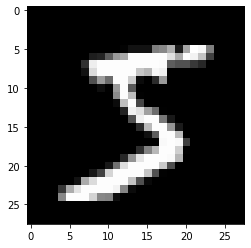

In [ ]:
# plot an image
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# create dataset object and convert images into pytorch tensors
dataset = MNIST(root='data/', 
                train=True, 
                transform=transforms.ToTensor())

torch.Size([1, 28, 28]) 5
tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


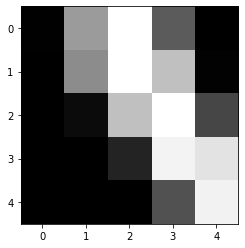

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [ ]:
import numpy as np
# function returns split indices from n by % from val_pct
def split_indices(n, val_pct):
  # Determine the size of validation set
  n_val = int(val_pct * n)
  # Create random permutation of 0 to n-1
  idx = np.random.permutation(n)
  # Pick first n_val indices for validation set
  return idx[n_val:], idx[:n_val]

In [ ]:
train_indices, val_indices = split_indices(len(dataset), val_pct = 0.2)
print(len(train_indices))
print(len(val_indices))

48000
12000


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils .data.dataloader import DataLoader

In [ ]:
batch_size = 100

# Training sampler and data loader
train_sampler = SubsetRandomSampler((train_indices))
train_loader = DataLoader(dataset,
                          batch_size, sampler = train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler((val_indices))
val_loader = DataLoader(dataset,
                          batch_size, sampler = val_sampler)

In [ ]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10
# Logistic Regression  model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.bias.shape)


torch.Size([10, 784])
torch.Size([10])


In [ ]:
# Redefining model to flatten the image into tensor
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

model = MnistModel()

In [ ]:
# Training model
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([0, 8, 6, 5, 2, 6, 8, 3, 4, 2, 1, 0, 3, 8, 9, 8, 8, 6, 4, 0, 1, 6, 1, 9,
        6, 3, 6, 1, 9, 8, 4, 8, 3, 6, 3, 7, 2, 8, 1, 4, 4, 6, 0, 0, 7, 8, 7, 1,
        2, 6, 4, 6, 3, 0, 6, 9, 6, 1, 3, 8, 5, 5, 0, 3, 9, 3, 8, 6, 9, 9, 3, 3,
        1, 0, 8, 2, 8, 5, 6, 6, 7, 1, 9, 8, 4, 0, 9, 1, 1, 3, 9, 7, 3, 7, 0, 7,
        6, 5, 0, 2])
torch.Size([100, 1, 28, 28])


In [ ]:
print(outputs.shape)
print(outputs[2].data)

torch.Size([100, 10])
tensor([-0.2750,  0.1070, -0.0521, -0.0958,  0.2220, -0.0261, -0.2351,  0.3594,
        -0.1126,  0.0165])


In [ ]:
import torch.nn.functional as F

# Apply softmax for each output row
probs  =F.softmax(outputs, dim = 1)

# Look at sample probabilities
print("Sample probabilities:\n", probs.data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[90]).item())

Sample probabilities:
 tensor([[0.0523, 0.1198, 0.1076, 0.1312, 0.1047, 0.1168, 0.0904, 0.0814, 0.0999,
         0.0958],
        [0.0964, 0.1040, 0.0952, 0.1003, 0.0826, 0.0976, 0.0989, 0.1045, 0.1238,
         0.0966],
        [0.0753, 0.1103, 0.0941, 0.0901, 0.1238, 0.0966, 0.0784, 0.1420, 0.0886,
         0.1008],
        [0.1006, 0.1004, 0.1044, 0.1197, 0.0928, 0.1014, 0.0736, 0.1223, 0.0859,
         0.0990],
        [0.0587, 0.1454, 0.1169, 0.0938, 0.0697, 0.1314, 0.0817, 0.1055, 0.0951,
         0.1020],
        [0.0905, 0.1162, 0.1033, 0.1264, 0.0784, 0.1036, 0.1013, 0.1129, 0.0865,
         0.0809],
        [0.1000, 0.0929, 0.1145, 0.0858, 0.1012, 0.0987, 0.0742, 0.1348, 0.1098,
         0.0879],
        [0.0760, 0.1120, 0.0760, 0.1115, 0.0950, 0.1245, 0.0931, 0.1037, 0.1089,
         0.0994],
        [0.0945, 0.1226, 0.0795, 0.1623, 0.1031, 0.0891, 0.0686, 0.0857, 0.1016,
         0.0930],
        [0.0700, 0.1201, 0.1016, 0.1116, 0.1057, 0.1075, 0.0716, 0.0979, 0.1162,
     

In [ ]:
# Prediction
max_probs, preds = torch.max(probs, dim=1)
print(preds)

tensor([3, 8, 7, 7, 1, 3, 7, 5, 3, 1, 6, 2, 3, 7, 4, 4, 5, 3, 3, 5, 2, 2, 3, 3,
        5, 8, 7, 6, 4, 8, 4, 8, 5, 7, 4, 3, 1, 7, 4, 4, 4, 3, 5, 2, 4, 4, 8, 3,
        2, 7, 2, 3, 3, 2, 7, 4, 3, 6, 4, 8, 3, 3, 3, 5, 4, 7, 7, 7, 3, 4, 3, 4,
        6, 2, 3, 1, 3, 3, 7, 3, 4, 6, 4, 3, 3, 8, 3, 1, 6, 3, 5, 5, 8, 3, 2, 5,
        7, 1, 5, 5])


In [ ]:
print(labels)

tensor([0, 8, 6, 5, 2, 6, 8, 3, 4, 2, 1, 0, 3, 8, 9, 8, 8, 6, 4, 0, 1, 6, 1, 9,
        6, 3, 6, 1, 9, 8, 4, 8, 3, 6, 3, 7, 2, 8, 1, 4, 4, 6, 0, 0, 7, 8, 7, 1,
        2, 6, 4, 6, 3, 0, 6, 9, 6, 1, 3, 8, 5, 5, 0, 3, 9, 3, 8, 6, 9, 9, 3, 3,
        1, 0, 8, 2, 8, 5, 6, 6, 7, 1, 9, 8, 4, 0, 9, 1, 1, 3, 9, 7, 3, 7, 0, 7,
        6, 5, 0, 2])


In [ ]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item() / len(l1)

In [ ]:
accuracy(preds, labels)

0.13

In [ ]:
# Accuracy and max is not differentiable so use cross entropy 
loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3289, grad_fn=<NllLossBackward>)


In [ ]:
# Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
  # Calculate loss
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    # Compute gradients
    loss.backward()
    # Update parameters
    opt.step()
    # Reset gradients
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    # Compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result

In [ ]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    # Pass each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
               for xb, yb in valid_dl]
    # Separate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    # Total size of dataset
    total = np.sum(nums)
    # Avg. loss across dataset
    avg_loss = np.sum(np.multiply(losses, nums)) / total
    avg_metric = None
    if metric is not None:
      # Avg. of metric across batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total
  return avg_loss, total, avg_metric

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() / len(preds)

In [ ]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f},'.format(val_loss, val_acc))

Loss: 2.3209, Accuracy: 0.1192,


In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
    accuracies = []
    for epoch in range(epochs):
        # Training
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)
        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        accuracies += [val_metric]
        # Print progress
        if metric is None:
           print('Epoch [{}/{}], Loss: {:.4f}'
                .format(epoch+1, epochs, val_loss))
        else:
           print('Epoch [{}/{}, Loss: {:.4f}, {}: {:.4f}'
                .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))
    return accuracies
         


In [ ]:
# Redefine model and optimizer
model = MnistModel() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
accuracies = fit(45, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/45, Loss: 1.8931, accuracy: 0.6647
Epoch [2/45, Loss: 1.5925, accuracy: 0.7468
Epoch [3/45, Loss: 1.3811, accuracy: 0.7769
Epoch [4/45, Loss: 1.2289, accuracy: 0.7966
Epoch [5/45, Loss: 1.1160, accuracy: 0.8078
Epoch [6/45, Loss: 1.0295, accuracy: 0.8164
Epoch [7/45, Loss: 0.9614, accuracy: 0.8227
Epoch [8/45, Loss: 0.9065, accuracy: 0.8290
Epoch [9/45, Loss: 0.8611, accuracy: 0.8322
Epoch [10/45, Loss: 0.8230, accuracy: 0.8358
Epoch [11/45, Loss: 0.7906, accuracy: 0.8393
Epoch [12/45, Loss: 0.7626, accuracy: 0.8425
Epoch [13/45, Loss: 0.7382, accuracy: 0.8450
Epoch [14/45, Loss: 0.7167, accuracy: 0.8472
Epoch [15/45, Loss: 0.6976, accuracy: 0.8500
Epoch [16/45, Loss: 0.6805, accuracy: 0.8524
Epoch [17/45, Loss: 0.6651, accuracy: 0.8545
Epoch [18/45, Loss: 0.6511, accuracy: 0.8560
Epoch [19/45, Loss: 0.6384, accuracy: 0.8578
Epoch [20/45, Loss: 0.6267, accuracy: 0.8585
Epoch [21/45, Loss: 0.6160, accuracy: 0.8596
Epoch [22/45, Loss: 0.6061, accuracy: 0.8612
Epoch [23/45, Loss:

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

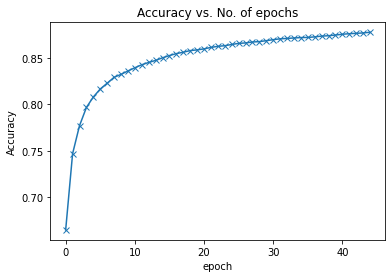

In [ ]:
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. No. of epochs')

In [ ]:
print(accuracies)

[0.85425, 0.8555, 0.8573333333333333, 0.8586666666666667, 0.8595]


In [ ]:
# Define test dataset
test_dataset = MNIST(root = 'data/',
                     train = False,
                     transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label 7


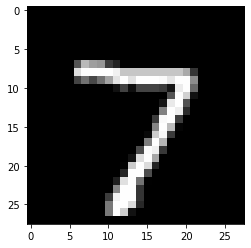

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Shape:', img.shape)
print('Label', label)

In [ ]:
 img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
# Predicts image
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return preds[0].item() 

Label: 7 , Predicted: 7


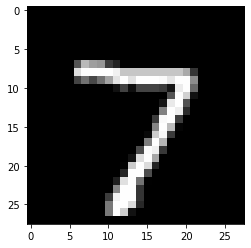

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
len(test_dataset)

10000

In [ ]:
 test_loader = DataLoader(test_dataset, batch_size = 200)

 test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric = accuracy)
 print('Loss: {:.4f}, Accuracy: {:.4f}, Total Test Cases: {}'.format(test_loss, test_acc, total))

Loss: 0.4573, Accuracy: 0.8886, Total Test Cases: 10000


In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

# .state_dict (arranged as a dictionary) returns an OrderedDict containing all the weights and bias metrices 

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0064,  0.0243, -0.0334,  ...,  0.0163, -0.0106, -0.0274],
                      [ 0.0145,  0.0320,  0.0326,  ..., -0.0170,  0.0344, -0.0129],
                      [-0.0194,  0.0060,  0.0197,  ..., -0.0168, -0.0052,  0.0176],
                      ...,
                      [-0.0021, -0.0239, -0.0070,  ..., -0.0323,  0.0346,  0.0107],
                      [ 0.0172,  0.0132,  0.0167,  ...,  0.0268,  0.0291,  0.0035],
                      [-0.0297, -0.0081, -0.0206,  ..., -0.0264,  0.0319,  0.0175]])),
             ('linear.bias',
              tensor([-0.0771,  0.1415, -0.0652, -0.0517,  0.0430,  0.1113,  0.0015,  0.0678,
                      -0.2084, -0.0128]))])

In [ ]:
 # Sanity check to see model2 has same loss and accuracy as model
 test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric = accuracy)
 print('Loss: {:.4f}, Accuracy: {:.4f}, Total Test Cases: {}'.format(test_loss, test_acc, total))

Loss: 0.4573, Accuracy: 0.8886, Total Test Cases: 10000
